In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from matplotlib.ticker import FuncFormatter

In [2]:
months = ['november2022', 'december2022', 'january2023', 'february2023', 'mars2023', 'april2023', 'may2023', 
          'june2023', 'july2023', 'august2023', 'september2023', 'october2023']
dataframes = {}

for month in months:
    # Define the file path
    file_path = '../data/listings/listings_' + month + '.csv.gz'
    # Use gzip.open to decompress the file and then read it with Pandas
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        data = pd.read_csv(file)

    dataframes[month] = data

C:\Users\heiwi\AppData\Local\Temp\ipykernel_6396\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_6396\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_6396\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_6396\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_6396\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Lo

In [3]:
# Read training and test set
training_set = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

In [4]:
training_ids = training_set['id'].unique()
test_ids = test_set['id'].unique()

In [5]:
for month, df in dataframes.items():
    # Remove both dollar sign and commas, then convert the column to float
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

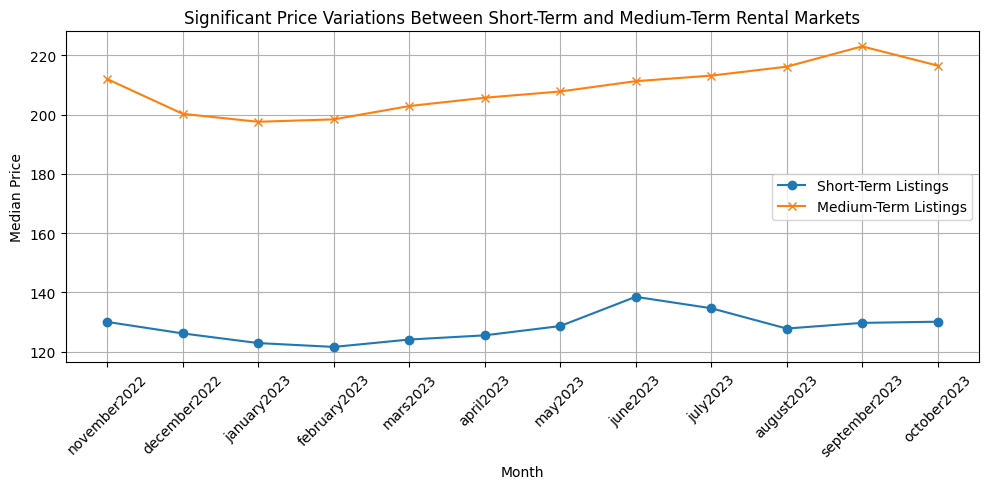

In [6]:
def mean_price_for_ids(df, ids):
    return df[df['id'].isin(ids)]['price'].mean()

# Now, calculate the mean price for training and test sets for each month.
training_means = []
test_set_means = []
months = []

# Loop through each month in the dictionary.
for month, df in dataframes.items():
    months.append(month)
    training_means.append(mean_price_for_ids(df, training_ids))
    test_set_means.append(mean_price_for_ids(df, test_ids))

# Now we will plot the means for each set as line plots in the same plot.
plt.figure(figsize=(10, 5))

# Plotting training set means.
plt.plot(months, training_means, label='Short-Term Listings', marker='o')

# Plotting test set means.
plt.plot(months, test_set_means, label='Medium-Term Listings', marker='x')

# Adding titles and labels
plt.title('Significant Price Variations Between Short-Term and Medium-Term Rental Markets')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)

# Rotate the month labels on x-axis for better readability.
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\heiwi\AppData\Local\Temp\ipykernel_6396\2071497526.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(months, rotation=90)


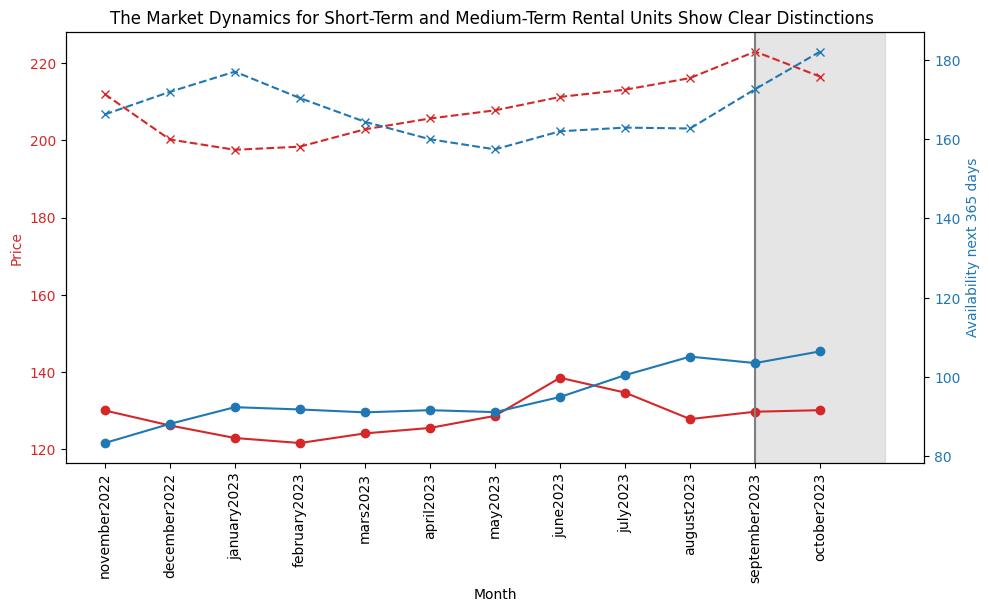

In [12]:
# Placeholder for the mean values
mean_values = {
    'month': [],
    'train_price_mean': [],
    'test_price_mean': [],
    'train_availability_mean': [],
    'test_availability_mean': []
}

# Calculate the mean values for each month and for both sets of IDs
for month, df in dataframes.items():
    train_df = df[df['id'].isin(training_ids)]
    test_df = df[df['id'].isin(test_ids)]
    
    mean_values['month'].append(month)
    mean_values['train_price_mean'].append(train_df['price'].mean())
    mean_values['test_price_mean'].append(test_df['price'].mean())
    mean_values['train_availability_mean'].append(train_df['availability_365'].mean())
    mean_values['test_availability_mean'].append(test_df['availability_365'].mean())

# Create a DataFrame from the mean values
mean_df = pd.DataFrame(mean_values)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
# Assuming `ax` is your AxesSubplot object from plt.subplots()
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax1.set_xlabel('Month')
ax1.set_ylabel('Price', color=color)
ax1.plot(mean_df['month'], mean_df['train_price_mean'], color=color, marker='o')
ax1.plot(mean_df['month'], mean_df['test_price_mean'], color=color, linestyle='--', marker='x')
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Availability next 365 days', color=color)  # we already handled the x-label with ax1
ax2.plot(mean_df['month'], mean_df['train_availability_mean'], color=color, marker='o')
ax2.plot(mean_df['month'], mean_df['test_availability_mean'], color=color, linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(loc='upper right')

# The second last label has the index length of the list minus 2
x_position = len(months) - 2

# Draw a vertical line (vline) at the second last x-axis label index
ax1.axvline(x=x_position, color='grey', linestyle='-')

# Fill the area to the right of the vertical line with grey color
# The end position is set to the length of the months list, assuming
# you have one label per month and they are equally spaced.
ax1.axvspan(x_position, len(months), color='grey', alpha=0.2)

# Assuming 'months' is your x-axis data and 'ax' is your AxesSubplot object
ax1.set_xticklabels(months, rotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('The Market Dynamics for Short-Term and Medium-Term Rental Units Show Clear Distinctions ')
plt.show()
